In [7]:
from dynamic import DynamicModel
from beam import GetCompletions, InitBeam,GetSavedKeystrokes
from model import MetaModel
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
#from AMSGrad import AMSGrad

In [2]:
m = MetaModel('../referit_experiment_img_4_3')
m.MakeSessionAndRestore(2)

[None, 512]
(?, 32, 32, 512)
INFO:tensorflow:Restoring parameters from ../referit_experiment_img_4_3/model.bin


In [3]:
# m = DynamicModel(
#     '/Users/Sam/Desktop/School/Deep Learning/FinalProject/query_completion/referit_experiment_img', 
#     learning_rate=1.0,
#     optimizer=tf.train.GradientDescentOptimizer)

# m.session.run(m.reset_user_embed)

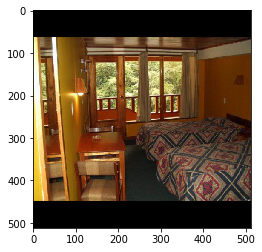

In [45]:
example_image = np.load('../data/referit/img_train/1334.npy')
plt.imshow(example_image)

In [46]:
vgg_feat = m.ComputeVGG(example_image)

Query: "a"

beam 4.471: <S>area on right</S>
beam 4.339: <S>above bed</S>
beam 4.289: <S>anywhere on right</S>
beam 3.767: <S>area</S>
beam 3.105: <S>anywhere</S>


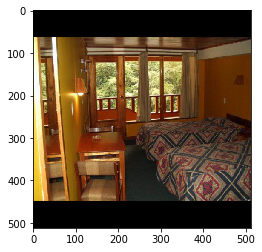

In [48]:
prefix = 'a'
b = GetCompletions(['<S>'] + list(prefix), vgg_feat, m, branching_factor=4, beam_size=100)
plt.imshow(example_image)
print('Query: "{}"\n'.format(prefix))
for item in list(b)[-5:]:
    print item

In [31]:
for prefix in ['t','th','the','the ','the b','the bed']:
    print(list(GetCompletions(['<S>'] + list(prefix), vgg_feat, m, branching_factor=4, beam_size=100))[-1])

beam 2.743: <S>table</S>
beam 3.432: <S>the window</S>
beam 3.322: <S>the window</S>
beam 3.321: <S>the window</S>
beam 1.696: <S>the bed</S>
beam 1.324: <S>the bed</S>


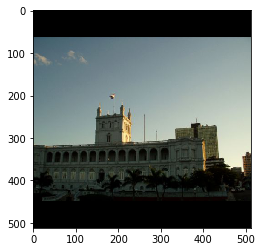

In [43]:
example_image = np.load('../data/referit/img_val/51.npy')
#example_image = np.zeros((512,512,3))
plt.imshow(example_image)
vgg_feat = m.ComputeVGG(example_image)

Query: "t"

beam 4.247: <S>tallest building</S>
beam 4.060: <S>top right building</S>
beam 3.976: <S>top left building</S>
beam 3.724: <S>the sky</S>
beam 3.324: <S>the building</S>


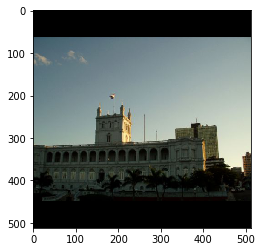

In [44]:
prefix = 't'
b = GetCompletions(['<S>'] + list(prefix), vgg_feat, m, branching_factor=4, beam_size=100)
plt.imshow(example_image)
print('Query: "{}"\n'.format(prefix))
for item in list(b)[-5:]:
    print item

In [37]:
for prefix in ['t','th','the','the s','the sky ','the sky ab']:
    print(list(GetCompletions(['<S>'] + list(prefix), vgg_feat, m, branching_factor=4, beam_size=100))[-1])

beam 3.324: <S>the building</S>
beam 2.544: <S>the building</S>
beam 2.469: <S>the building</S>
beam 0.852: <S>the sky</S>
beam 2.508: <S>the sky on right</S>
beam 2.023: <S>the sky above building</S>


In [51]:
m.session.graph.